#### Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
imported = pd.read_csv('housing_bos.csv',header=None, delimiter=r'\s+')

In [84]:
data = imported.copy()

In [85]:
columns = 'CRIM ZN INDUS CHAS NOX ROOMS_PER_HOUSE AGE<1940 DIS RAD TAX PUPILTEACHERRATIO B LSTATUS% PRICE'.split()

In [86]:
data.columns = columns
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,ROOMS_PER_HOUSE,AGE<1940,DIS,RAD,TAX,PUPILTEACHERRATIO,B,LSTATUS%,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>,
        <Axes: title={'center': 'ROOMS_PER_HOUSE'}>,
        <Axes: title={'center': 'AGE<1940'}>,
        <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PUPILTEACHERRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTATUS%'}>,
        <Axes: title={'center': 'PRICE'}>, <Axes: >, <Axes: >]],
      dtype=object)

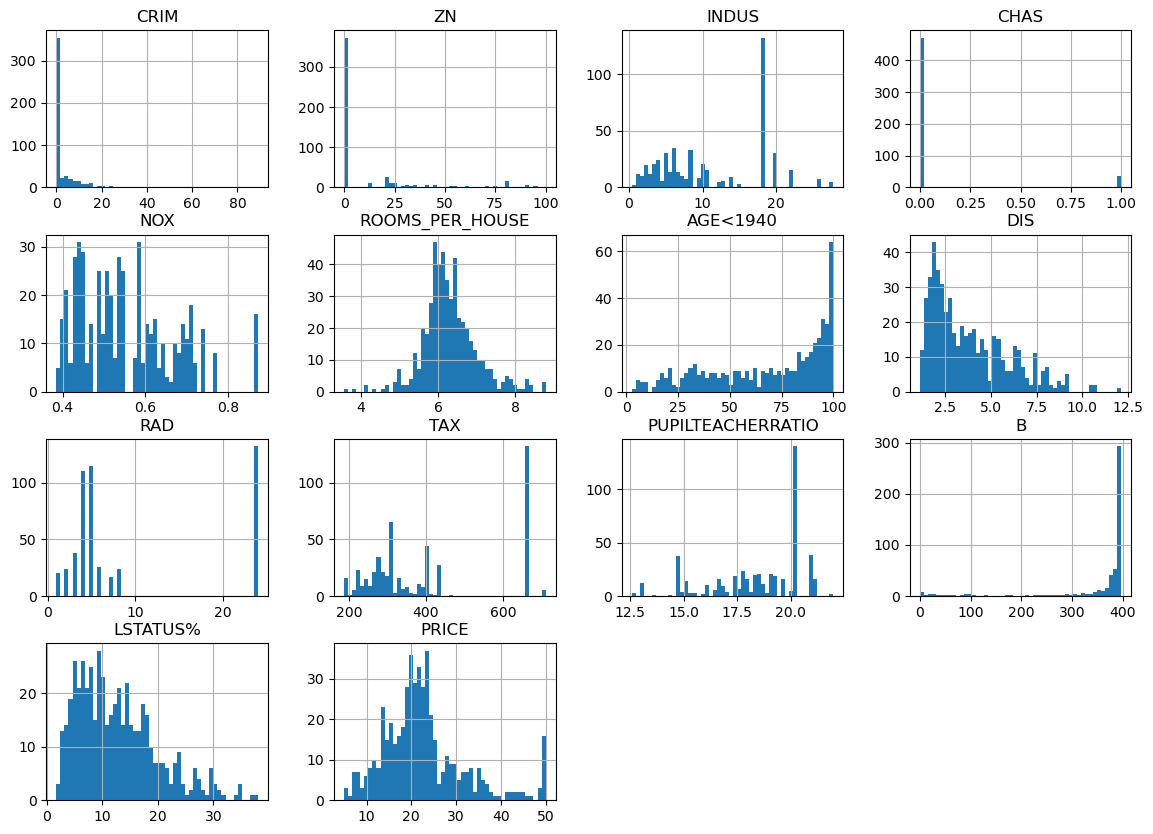

In [87]:
data.hist(figsize=(14,10), bins=50)

c:\Users\wasif\miniconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wasif\miniconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wasif\miniconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wasif\miniconda3\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

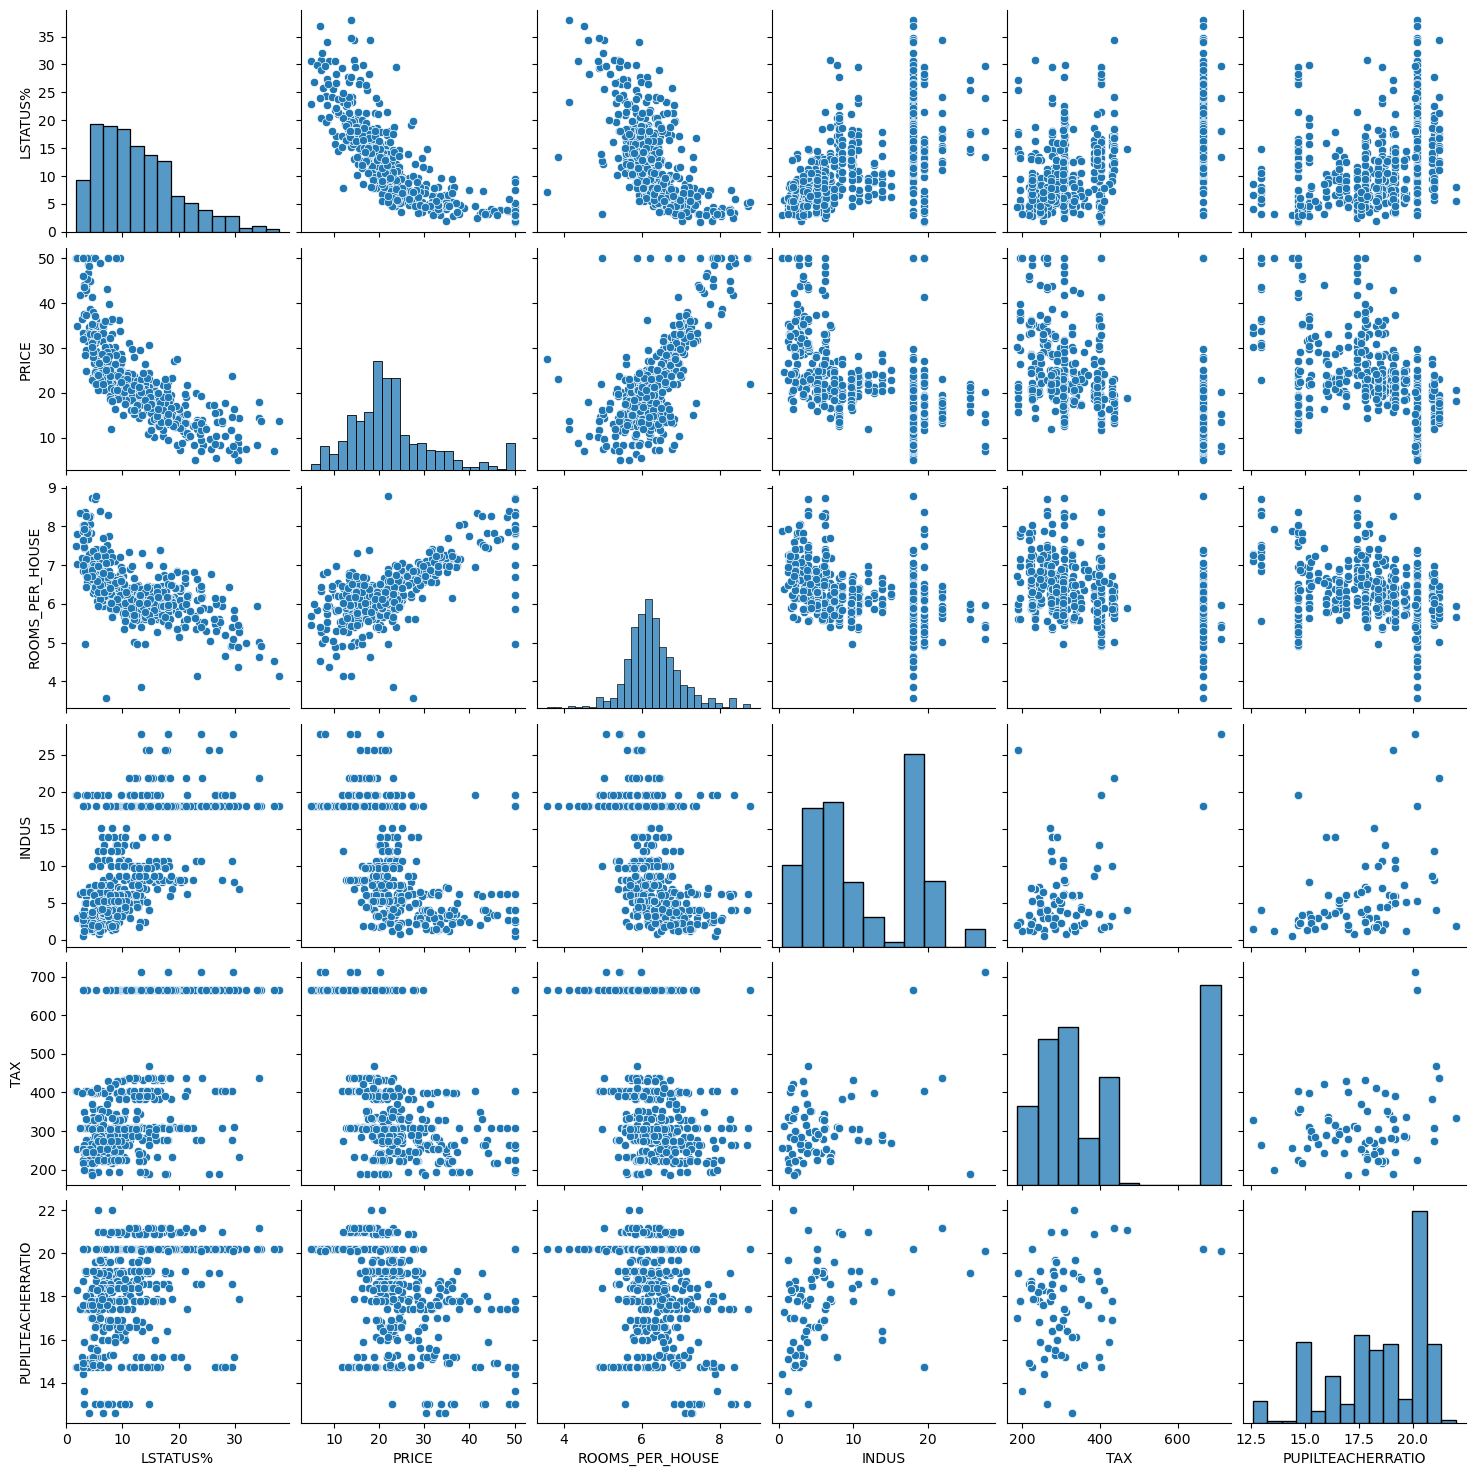

In [112]:
sns.pairplot(data=data[['LSTATUS%', 'PRICE', 'ROOMS_PER_HOUSE', 'INDUS', 'TAX', 'PUPILTEACHERRATIO']])

In [89]:

data.corrwith(data['PRICE']).sort_values(ascending=False)

PRICE                1.000000
ROOMS_PER_HOUSE      0.695360
ZN                   0.360445
B                    0.333461
DIS                  0.249929
CHAS                 0.175260
AGE<1940            -0.376955
RAD                 -0.381626
CRIM                -0.388305
NOX                 -0.427321
TAX                 -0.468536
INDUS               -0.483725
PUPILTEACHERRATIO   -0.507787
LSTATUS%            -0.737663
dtype: float64

### We can see that price is really dependent on rooms per house and Lstatus % which is equal to 1/2 of proportion of adults without, some high school education and proportion of male workers classified as laborers

In [90]:
data = data.drop('CHAS', axis=1)

In [91]:
room_ratio_bins = pd.cut(data['ROOMS_PER_HOUSE'], bins=[0,2.5,5,7.5,10], labels=[1,2,3,4])
data['ROOM_RATIO_BINS'] = room_ratio_bins

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['PRICE'], test_size=0.2, stratify=room_ratio_bins, random_state=42)

In [94]:
X_train['ROOM_RATIO_BINS'].value_counts() / len(data)

ROOM_RATIO_BINS
3    0.731225
4    0.041502
2    0.025692
1    0.000000
Name: count, dtype: float64

In [95]:
for set in (X_train, X_test):
    set.drop('ROOM_RATIO_BINS', axis=1, inplace=True)

In [97]:
housing_train = X_train.drop('PRICE', axis=1)
training_labels = X_train['PRICE'].copy()

In [115]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

<Axes: >

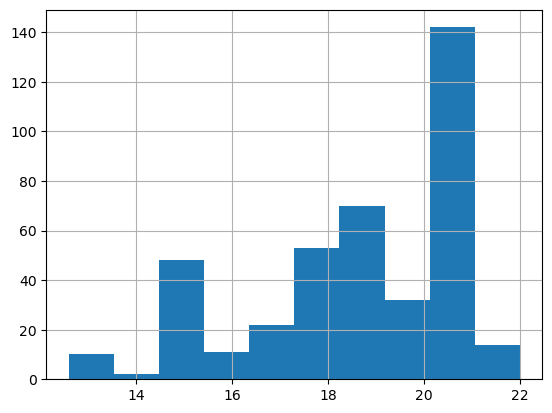

In [116]:
X_train.PUPILTEACHERRATIO.hist()

In [117]:
class PupilBucketizer(BaseEstimator, TransformerMixin):
    def __init__(self, bins, labels=None):
        self.bins = bins
        self.labels = labels
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        bucketized = pd.cut(X, bins=self.bins, labels=self.labels)
        return bucketized

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out='one-to-one'),
    StandardScaler()
    )


377    5
354    5
395    5
372    5
396    5
      ..
441    5
454    5
96     4
417    5
343    4
Name: PUPILTEACHERRATIO, Length: 404, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]